# Decision Tree

의사 결정 나무(decision tree)는 여러 가지 규칙을 순차적으로 적용하면서 독립 변수 공간을 분할하는 분류 모형이다. 분류(classification)와 회귀 분석(regression)에 모두 사용될 수 있다. 여기에서는 의사 결정 나무로 분류 문제를 푸는 법을 설명한다.

__Classification : Ordinal Variables & Normal(Binary)__

1. 여러가지 독립 변수 중 하나의 독립 변수를 선택하고 그 독립 변수에 대한 __기준값(threshold)을 정한다.__ 이를 분류 규칙이라고 한다. 최적의 분류 규칙을 찾는 방법은 이후에 자세히 설명한다.
<br/><br/>
2. 전체 학습 데이터 집합(부모 노드)을 해당 독립 변수의 값이 기준값보다 큰 데이터 그룹(자식 노드 1)과 해당 독립 변수의 값이 기준값보다 작은 데이터 그룹(자식 노드 2)으로 나눈다.
<br/><br/>
3. 자식 노드에 있는 데이터의 클래스의 비율을 조사하여 가장 데이터 수가 많은 클래스를 그 자식 노드의 대표 클래스로 정한다.
<br/><br/>
4. 각각의 자식 노드에 대해 1~3의 단계를 반복하여 하위의 자식 노드를 만든다. 단, 자식 노드에 한가지 클래스의 데이터만 존재한다면 더 이상 자식 노드를 나누지 않고 중지한다.
<br/><br/>
5. 이렇게 자식 노드 나누기를 연속적으로 적용하면 노드가 계속 증가하는 나무(tree)와 같은 형태로 표현할 수 있다.

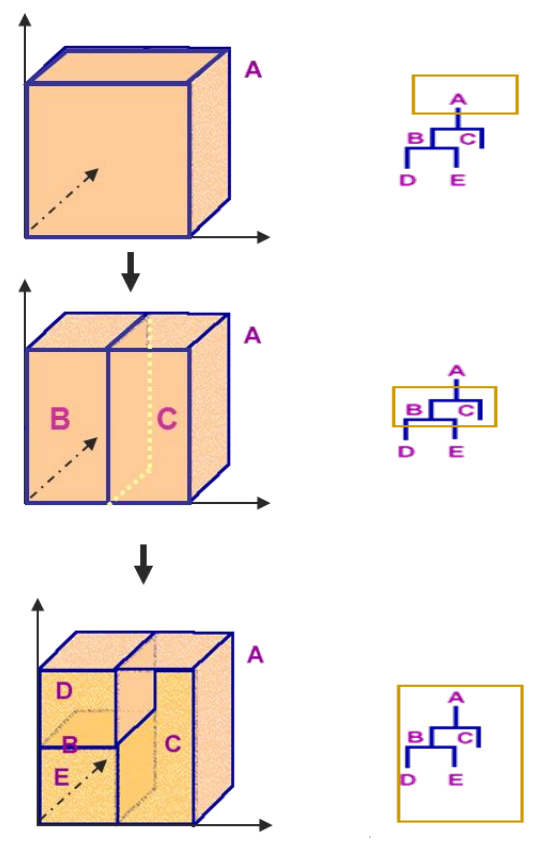

### 분류 규칙! Select threshold and X_variable

> __Find X variable, threshold according to parents and child node__

- __Maximize information gain__
<br/><br/>
정보 획득량(information gain)는  X 라는 조건에 의해 확률 변수  Y 의 엔트로피가 얼마나 감소하였는가를 나타내는 값이다. 다음처럼  Y 의 엔트로피에서  X 에 대한  Y 의 조건부 엔트로피를 뺀 값으로 정의된다.
<br/><br/>

$$
IG[Y,X] = H[Y] - H[Y|X]
$$
- __Minimize entropy__ 
<br/>
 m개의 레코드가 속하는 X영역에 대한 엔트로피는 아래와 같은 식으로 정의됩니다. ($P(x)$=A영역에 속하는 레코드 가운데 X 범주에 속하는 레코드의 비율)
<br/><br/>
$$ H[X] = - \sum_x p(x)\log_2 p(x) \qquad $$ 

### 모델학습
- __재귀적 분기 (recursive partitioning)__ : 입력변수 영역을 두개로 구분함
    - 분기전 정보획득과 분기 후 정보획득을 비교합니다
    - 모든 경우의 수 가운데 정보 획득이 가장 큰 변수와 그 지점을 택해 첫 분기로 결정합니다.
    - 계산량 : 1회 분기를 위해 계산하는 경우의 수는, data set = n, feature = d 일때, $d(n-1)$입니다. 분기를 안하는 경우를 제외하고 모든 개체와 변수를 고려합니다.
<br/>
<br/>
- __가지치기 (pruning)__ : 너무 자세하게 구분된 영역을 통합하는 과정
    - 모든 terminal node의 순도가 100%인 상태를 full tree라고 하는데요. Full tree를 생성한 뒤 적절한 수준에서 terminal node를 결합해주어야합니다. 분기가 너무 많을 경우 __over-fitting 과적합__의 염려가 있습니다. (Generalization 능력이 떨어짐)
    - 가지치기는 데이터를 버리는 개념이 아니고 분기를 합치는(merge) 개념으로 이해해야 합니다.

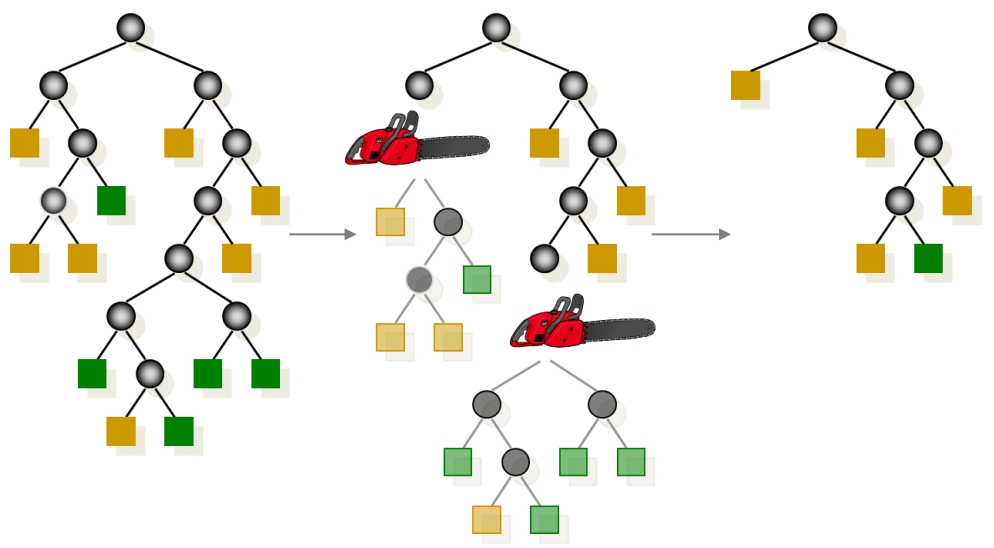

### 가지치기 비용함수 (cost function)

$$
CC(T)=Err(T)+\alpha \times L(T)
$$

- CC(T) : 의사결정 나무의 비용 복잡도 (= 오류가 적으면서 terminal node 수가 적은 단순한 모델일 수록 작다 )
- EER(T) : Test-data 에 대한 오 분류율
- L(T) = Terminal node의 수 (구조의 복잡도)
- $\alpha$ : 가중치 보통 0.01~0.1값을 사용

### 불순도 & 불확실성

- homogeneity : 
- Impurity : 
- uncertainty :
- information :

### Greedy strategy.
- Determine how to split the records
- Determine when to shop splitting

Nodes with homogeneous class distribution are perferred,
<br/>
Need a measure of node impurity
- Non-homogeneous = High inpurity
- Homogenous = Low inpurity

- class sklearn.tree.DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False

- criterion : string, optional (default=”gini”)
    - The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

- splitter : string, optional (default=”best”)
    - The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.
- max_depth : int or None, optional (default=None)
    - The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- min_samples_split : int, float, optional (default=2)
    - The minimum number of samples required to split an internal node:

If int, then consider min_samples_split as the minimum number.
If float, then min_samples_split is a percentage and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.
Changed in version 0.18: Added float values for percentages.

- min_samples_leaf : int, float, optional (default=1)
    - The minimum number of samples required to be at a leaf node:

    If int, then consider min_samples_leaf as the minimum number.
    If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.
    Changed in version 0.18: Added float values for percentages.

- min_weight_fraction_leaf : float, optional (default=0.)

    - The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

- max_features : int, float, string or None, optional (default=None)

    - The number of features to consider when looking for the best split:

    If int, then consider max_features features at each split.
    If float, then max_features is a percentage and int(max_features * n_features) features are considered at each split.
    If “auto”, then max_features=sqrt(n_features).
    If “sqrt”, then max_features=sqrt(n_features).
    If “log2”, then max_features=log2(n_features).
    If None, then max_features=n_features.
    Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.

- random_state : int, RandomState instance or None, optional (default=None)

    - If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

- max_leaf_nodes : int or None, optional (default=None)

    - Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

- min_impurity_decrease : float, optional (default=0.)
    - A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

- min_impurity_split : float,
    - Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

- class_weight : dict, list of dicts, “balanced” or None, default=None
    - Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.

- presort : bool, optional (default=False)
    - Whether to presort the data to speed up the finding of best splits in fitting. For the default settings of a decision tree on large datasets, setting this to true may slow down the training process. When using either a smaller dataset or a restricted depth, this may speed up the training.

### 코드구현




In [2]:
import pandas as pd
import math
from collections import Counter, defaultdict
from functools import partial

# 엔트로피 구하기

In [4]:
p=0.33
-p*math.log(p,2)

0.5278224832373695

In [5]:
## 클래스에 속할 확률을 입력하면 엔트로피 계산
## 확률이 0인 경우는 제외한다
def entropy(class_probabilities):
    return sum(-p*math.log(p,2) for p in class_probabilities if p is not 0)

In [8]:
p = 4/11
a = -p*math.log(p,2)

In [9]:
p = 7/11
b = -p*math.log(p,2)

In [10]:
a+b

0.9456603046006402

$ Entropy =-\log_2 { P(x) } $

In [22]:
def class_probabilities(labels):
    # 레이블의 총 개수 계산
    total_count = len(labels)
    # Counter(labels) = {Class 0:3, Class 1:2}
    # class0 prob = 0.6, class1 prob = 0.4
    return [float(count)/float(total_count) for count in Counter(labels).values()]

In [23]:
def data_entrpy(labeled_data):
    # 데이터를 받아서 레이블 정보만 뺀 뒤 리스트로 저장
    # ex) labels = [0,0,0,1,1]
    labels = [label for _, label in labeled_data]
    # 클래스 비율 계산
    probabilities = class_probabilities(labels)
    # 클래스 비율을 기반으로 엔트로피 계산
    return entropy(probabilities)

In [24]:
def partition_entropy(subsets):
    # subset은 레이블이 있는 데이터의 list의 list
    # 그에 대한 엔트로피를 계산한 뒤 모든 subset의 엔트로피 합친 값 반환
    total_count = sum(len(subset) for subset in subsets)
    return sum(data_entrpy(subset)*len(subset)/total_count for subset in subsets)

In [25]:
def partition_by(inputs, attribute):
    # attribute 기준으로 inputs을 부분집합으로 분리
    # attribute 변수 내에 3개의 값이 있다면 그룹 수 =3
    # level 기준 = Senior, Mid, Junior 3개 그룹
    groups = defaultdict(list)
    for input in inputs:
        #특정 attribute 값을 불러옴
        key = input[0][attribute]
        #이 input만을 올바른 list에 추가
        groups[key].append(input)
    return groups

In [26]:
def partition_entropy_by(inputs, attribute):
    # 주어진 파티션에 대응되는 엔트로피를 계산
    partitions = partition_by(inputs, attribute)
    return partition_entropy(partitions.values())

# Tree 구축하기

데이터에 재귀적 분기를 실시해 분기된 영역의 순도를 높이는 작업을 반복합니다. 다음과 같습니다.

In [27]:
def build_tree(inputs, split_candidates=None):
    # 첫 분기라면 입력 데이터의 모든 변수가 분기 후보
    if split_candidates is None:
        # 'lang', 'tweets', 'phd', 'level' 모두 후보
        split_candidates = inputs[0][0].keys()

    # 입력 데이터에서 범주별 개수를 세어 본다
    num_inputs = len(inputs)
    num_class0 = len([label for _, label in inputs if label])
    num_class1 = num_inputs - num_class0

    # class0(true)이 하나도 없으면 False leaf 반환
    if num_class0 == 0: return False
    # class1(false)이 하나도 없으면 Ture leaf 반환
    if num_class1 == 0: return True

    # 파티션 기준으로 사용할 변수가 없다면
    if not split_candidates:
        # 다수결로 결정
        # class0(true)가 많으면 true,
        # class1(false)가 많으면 false 반환
        return num_class0 >= num_class1

    # 아니면 가장 적합한 변수를 기준으로 분기
    best_attribute = min(split_candidates,
                         key=partial(partition_entropy_by, inputs))
    partitions = partition_by(inputs, best_attribute)
    new_candidates = [a for a in split_candidates
                      if a != best_attribute]

    # 재귀적으로 서브트리를 구축
    subtrees = { attribute_value : build_tree(subset, new_candidates)
                 for attribute_value, subset in partitions.iteritems()}
    # 기본값
    subtrees[None] = num_class0 > num_class1 
    return (best_attribute, subtrees)

In [28]:
def classify(tree, input):
    # 주어진 tree를 기준으로 input을 분류
    # 잎 노드이면 값 반환
    if tree in [True, False]:
        return tree

    # 그게 아니면 데이터의 변수로 분기
    # 키로 변수값, 값으로 서브트리를 나타내는 dict 사용
    attribute, subtree_dict = tree

    # 만약 입력된 데이터 변수 가운데 하나가
    # 기존에 관찰되지 않았다면 None
    subtree_key = input.get(attribute)

    # 키에 해당하는 서브트리가 존재하지 않을 때
    if subtree_key not in subtree_dict:
        # None 서브트리를 사용
        subtree_key = None

    # 적절한 서브트리를 선택
    subtree = subtree_dict[subtree_key]
    # 그리고 입력된 데이터를 분류
    return classify(subtree, input)

In [36]:
import math
from collections import Counter, defaultdict

def entropy(class_probabilites):
    # 클래스에 속할 확률을 입력하면 엔트로피 계산
    # 확률이 0인 경우는 제외함
    return sum(-p * math.log(p, 2) for p in class_probabilites if p is not 0)

def class_probabilities(labels):
    # 레이블의 총 개수 계산 : ex) 5
    total_count = len(labels)
    # Counter(labels) = {Class0 : 3, Class1 : 2}
    # class0 prob = 0.6, class1 prob = 0.4 반환
    return [float(count) / float(total_count) for count in Counter(labels).values()]

def data_entropy(labeled_data):
    # 데이터를 받아서 레이블 정보만 뺀 뒤 리스트로 저장
    # ex) labels = [0, 0, 0, 1, 1]
    labels = [label for _, label in labeled_data]
    # 클래스 비율 계산
    probabilities = class_probabilities(labels)
    # 클래스 비율을 토대로 엔트로피 계산
    return entropy(probabilities)

def partition_entropy(subsets):
    # subset은 레이블이 있는 데이터의 list의 list
    # 그에 대한 엔트로피를 계산한 뒤 모든 subset의 엔트로피 합친 값 반환
    total_count = sum(len(subset) for subset in subsets)
    # subset A의 엔트로피는 A 요소별 엔트로피의 합 * A의 영역 비율
    return sum(data_entropy(subset) * len(subset) / total_count for subset in subsets)

def partition_by(inputs, attribute):
    # attribute 기준으로 inputs를 부분 집합으로 분리
    # attribute 변수 내에 3개 값이 있다면 그룹수 = 3
    # ex) level 기준 = Senior, Mid, Junior 3개 그룹
    groups = defaultdict(list)
    for input in inputs:
        # 특정 attribute의 값을 불러옴
        key = input[0][attribute]
        # 이 input을 올바른 list에 추가
        groups[key].append(input)
    return groups

def partition_entropy_by(inputs, attribute):
    # 주어진 파티션에 대응되는 엔트로피를 계산
    partitions = partition_by(inputs, attribute)
    return partition_entropy(partitions.values())

SyntaxError: invalid syntax (<ipython-input-43-4d5f483937d9>, line 33)

In [40]:
tree = build_tree(inputs)


NameError: name 'subtrees' is not defined

In [44]:
    ({'x1': '1', 'x2': '1', 'x3': '1'}, True),
    ({'x1': '1', 'x2': '1', 'x3': '6'}, True),
    ({'x1': '1', 'x2': '0', 'x3': '5'}, False),
    ({'x1': '0', 'x2': '0', 'x3': '4'}, True),
    ({'x1': '0', 'x2': '1', 'x3': '7'}, False),
    ({'x1': '0', 'x2': '1', 'x3': '3'}, False),
    ({'x1': '0', 'x2': '0', 'x3': '8'}, False),
    ({'x1': '1', 'x2': '0', 'x3': '7'}, True),
    ({'x1': '0', 'x2': '1', 'x3': '5'}, False)
    ]

165473875

In [45]:
from sklearn import tree

In [67]:
X = [[1,1,1], [1,1,6],[1,0,5],[0,0,4],[0,1,7],[0,1,3],[0,0,8],[1,0,7],[0,1,5]]
y = [1,1,0,1,0,0,0,1,0]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [68]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [69]:
>>> import graphviz 
>>> dot_data = tree.export_graphviz(clf, out_file=None) 
>>> graph = graphviz.Source(dot_data) 
>>> graph.render("l") 

'l.pdf'

In [70]:
A=['x1','x2','x3']
B=['1','0']

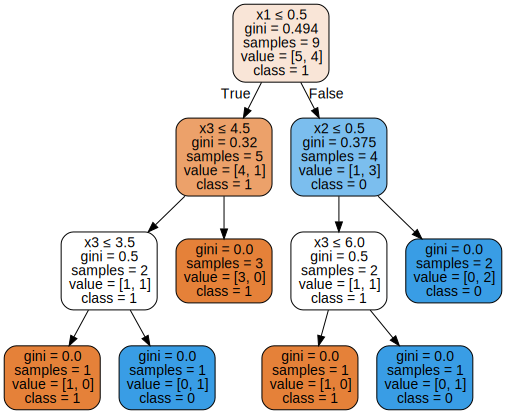

In [88]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=A,  
                         class_names=B,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [89]:
def gini(p):
    return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))

In [97]:
p1=gini(1/4)

In [98]:
p2=gini(1/5)

In [99]:
p3=gini(4/9)

In [111]:
a=p1*4/9

In [112]:
b=p2*5/9

In [113]:
a+b

0.34444444444444444